# Dynamic Foucault Simulations

**Scott Prahl**

**Jan 2023**

In [1]:
%matplotlib widget

import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from lenstest import foucault

%config InlineBackend.figure_format='retina'

interactive(children=(FloatSlider(value=0.0, description='conic', max=1.0, min=-1.0, step=0.02), FloatSlider(v…

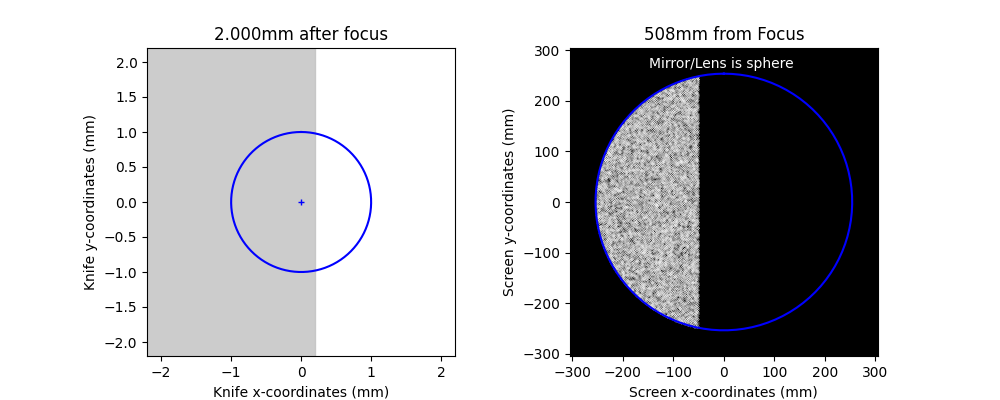

In [2]:
D = 20*25.4
z_offset = 2
x_offset = -0.03
conic = 1
phi = 0

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1, 1, 1)

def update(conic=0, x_offset = 20, z_offset=2, RoC=D):
    fig.clear()
    foucault.plot_knife_and_screen(D, RoC, x_offset, z_offset, conic, phi=phi, init=False)
    fig.canvas.draw_idle()


ipywidgets.interact(update, RoC=(D,1000,100), conic = (-1,1,0.02), x_offset=(-0.2,0.2,0.02), z_offset=(-5,5,0.1));

In [3]:
help(foucault.plot_knife_and_screen)

Help on function plot_knife_and_screen in module lenstest.foucault:

plot_knife_and_screen(D, RoC, x_offset, z_offset, conic=0, phi=0, init=True, A=0, on_grid=False, invert=False)
    Plot the Foucault knife edge image.
    
    The idea is to graph both the beam on the knife edge and the expected
    projection on a screen located at the radius-of-curvature away from
    the focus.  This allows rapid visualization or roughly how much
    of the knife edge interacts with the screen.
    
    The beam size is limited by the diffraction focus limit of the beam
    (assuming a 1000nm wavelength).
    
    Args:
        D: diameter of mirror [mm]
        RoC: radius of curvature of mirror [mm]
        x_offset: transverse knife edge offset from optical axis [mm]
        z_offset: axial knife edge offset from paraxial focus [mm]
        conic: conic or Schwartzchild constant [-]
        phi: CCW rotation of Ronchi ruling from vertical [radians]
        init: set to False to allow updating p

interactive(children=(FloatSlider(value=0.0, description='conic', max=1.0, min=-1.0, step=0.02), FloatSlider(v…

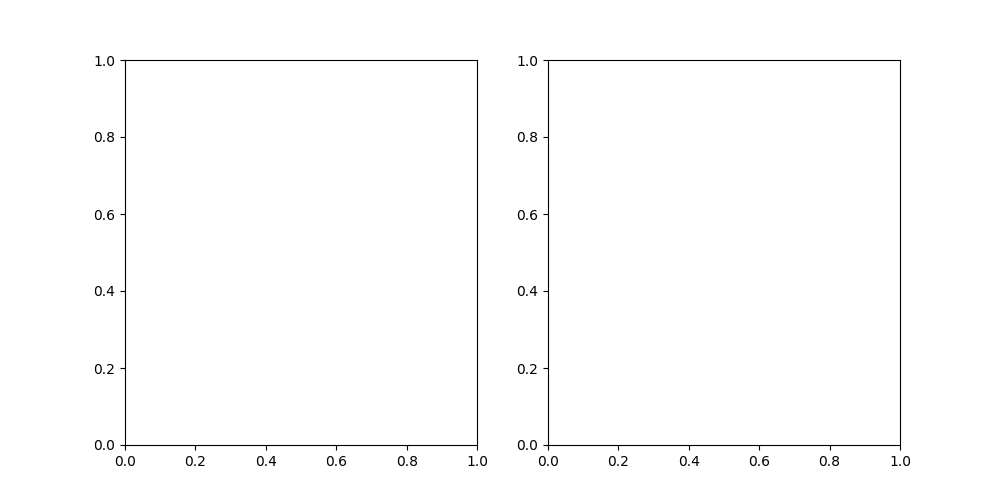

In [4]:
D = 20*25.4
z_offset = 2
x_offset = -0.03
conic = 1
phi = 0

plt.subplots(1,2,figsize=(10,5))

def update(conic=0, x_offset = 20, z_offset=2, RoC=D):
    ronchi.plot_gram(D, RoC, x_offset, z_offset, conic, phi=phi)

ipywidgets.interact(update, RoC=(D,1000,100), conic = (-1,1,0.02), x_offset=(-0.2,0.2,0.02), z_offset=(-5,5,0.1));

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

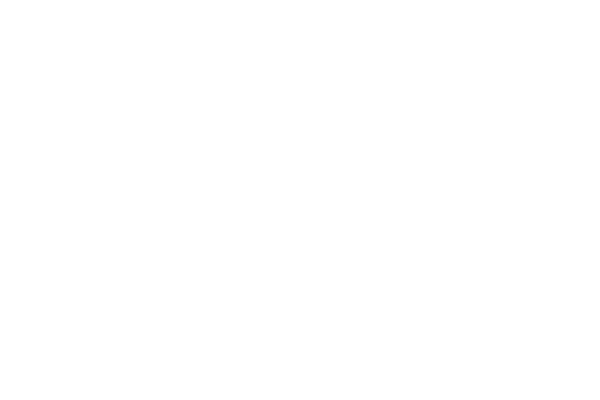

In [5]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@ipywidgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    fig.clear()
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')
    fig.canvas.draw_idle()
   